In [69]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib  import pyplot as plt
%matplotlib inline

In [70]:
df = pd.read_csv('income.csv')
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


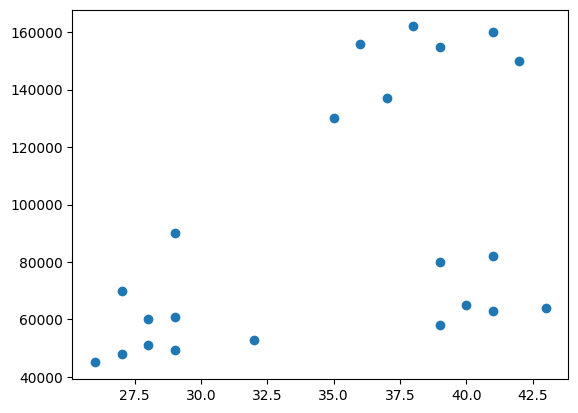

In [71]:
plt.scatter(df['Age'],df['Income($)'])

In [72]:
km = KMeans(n_clusters=4)
y_pred = km.fit_predict(df[['Age','Income($)']])
y_pred

array([2, 2, 0, 0, 1, 1, 1, 1, 1, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0],
      dtype=int32)

In [73]:
df['cluster'] = y_pred
df.head()

,Name,Age,Income($),cluster
0,Rob,27,70000,2
1,Michael,29,90000,2
2,Mohan,29,61000,0
3,Ismail,28,60000,0
4,Kory,42,150000,1


In [74]:
km.cluster_centers_

array([[3.29090909e+01, 5.61363636e+04],
       [3.92000000e+01, 1.56600000e+05],
       [3.40000000e+01, 8.05000000e+04],
       [3.60000000e+01, 1.33500000e+05]])

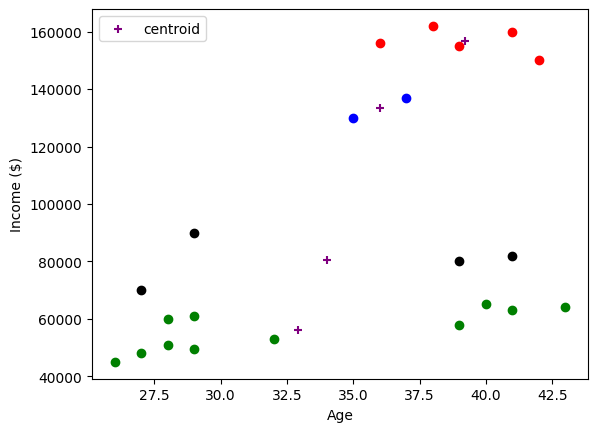

In [75]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
df4 = df[df.cluster==3]
plt.scatter(df1.Age,df1['Income($)'],color='green')
plt.scatter(df2.Age,df2['Income($)'],color='red')
plt.scatter(df3.Age,df3['Income($)'],color='black')
plt.scatter(df4.Age,df4['Income($)'],color='blue')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='+',label='centroid')
plt.xlabel('Age')
plt.ylabel('Income ($)')
plt.legend()

In [76]:
min_max_scaler = MinMaxScaler()

min_max_scaler.fit(df[['Income($)']])
df['Income($)'] = min_max_scaler.transform(df[['Income($)']])

min_max_scaler.fit(df[['Age']])
df['Age'] = min_max_scaler.transform(df[['Age']])
df

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,2
1,Michael,0.176471,0.384615,2
2,Mohan,0.176471,0.136752,0
3,Ismail,0.117647,0.128205,0
4,Kory,0.941176,0.897436,1
5,Gautam,0.764706,0.940171,1
6,David,0.882353,0.982906,1
7,Andrea,0.705882,1.000000,1
8,Brad,0.588235,0.948718,1
9,Angelina,0.529412,0.726496,3


In [77]:
km = KMeans(n_clusters=4)
y_pred = km.fit_predict(df[['Age','Income($)']])
y_pred

array([1, 3, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0],
      dtype=int32)

In [78]:
df['cluster']=y_pred
df.head()


,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,1
1,Michael,0.176471,0.384615,3
2,Mohan,0.176471,0.136752,1
3,Ismail,0.117647,0.128205,1
4,Kory,0.941176,0.897436,2


In [79]:
km.cluster_centers_

array([[0.85294118, 0.2022792 ],
       [0.13235294, 0.08279915],
       [0.72268908, 0.8974359 ],
       [0.17647059, 0.38461538]])

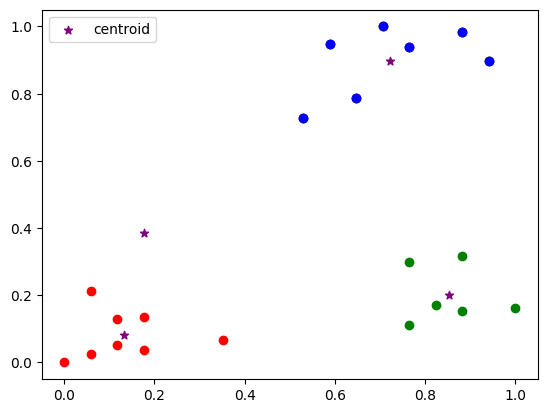

In [80]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
plt.scatter(df1.Age,df1['Income($)'],color='green')
plt.scatter(df2.Age,df2['Income($)'],color='red')
plt.scatter(df3.Age,df3['Income($)'],color='black')
plt.scatter(df3.Age,df3['Income($)'],color='Blue')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.legend()

In [81]:
sum_of_squared_errors = []
k_ranges = range(1,10)
for k in k_ranges:
    km = KMeans(n_clusters=k)
    km.fit(df[['Age','Income($)']])
    sum_of_squared_errors.append(km.inertia_)

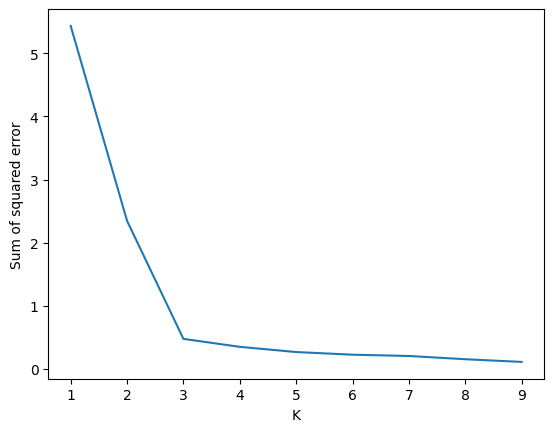

In [82]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_ranges,sum_of_squared_errors)